<a href="https://colab.research.google.com/github/Thripura24/Thripura24/blob/main/Treads_ratings_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
plt.style.use('ggplot')

In [2]:
# Uploading file
file_path = '/content/37000_reviews_of_thread_app.csv'

columns_to_read = ['source', 'review_id', 'user_name', 'review_description', 'rating', 'review_date', 'laguage_code', 'country_code', 'thumbs_up']

df = pd.read_csv(file_path, usecols=columns_to_read)

# Exploratory data analysis


In [3]:
# View first five data
df.reset_index(inplace = True)
df.head()

,index,source,review_id,user_name,review_description,rating,thumbs_up,review_date,laguage_code,country_code
0,0,Google Play,7cd90e5b-4829-43b9-9fb4-c8c6d1e339c1,Eddie Clark Jr.,Good,5,0.0,2023-08-07 19:14:36,en,us
1,1,Google Play,6deb8265-2bac-4524-bcb6-f90829fa4e69,Rasa RT,Weak copy of Twitter,1,0.0,2023-08-07 19:07:04,en,us
2,2,Google Play,91ef61ce-0f05-4f3b-b3d3-5d19cd408ab8,SITI NUR HAFIZA BINTI AZIZ,i wish threads have a save button for images a...,3,0.0,2023-08-07 18:57:07,en,us
3,3,Google Play,b7721b78-6b77-4f8c-a1d3-a854af4c1f0f,Asap Khalifah,Love it,5,0.0,2023-08-07 18:37:16,en,us
4,4,Google Play,c89ef522-c94c-4171-878f-1d672dce7f11,Syed Hussein,Very god,5,0.0,2023-08-07 18:14:15,en,us


In [4]:
# Checking shape of the dataset
df.shape

(36943, 10)

In [5]:
# Ratings for the app
df['rating'].value_counts()
example = df['review_description'][55]
example

'Super intuitive and easily portable from Instagram etc. I enjoy it I just always forget to use the damn thing after the influx when it debuted!'

In [6]:
# Thumbs up given for the app
df['thumbs_up'].value_counts()

0.0      30611
1.0       2889
2.0        520
3.0        193
4.0        124
         ...  
164.0        1
91.0         1
547.0        1
268.0        1
114.0        1
Name: thumbs_up, Length: 149, dtype: int64

# Visualization

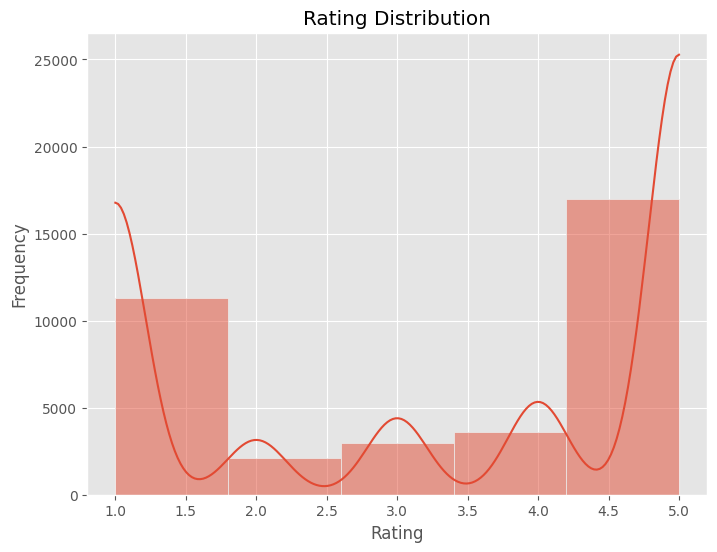

In [7]:
# Rating distribution analysis
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='rating', bins=5, kde=True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

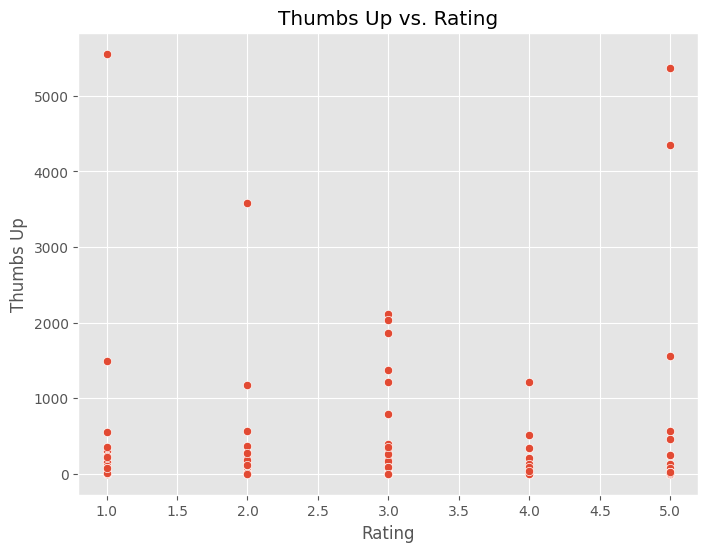

In [8]:
# Thumbs Up vs. Rating
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='rating', y='thumbs_up')
plt.title('Thumbs Up vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Thumbs Up')
plt.show()

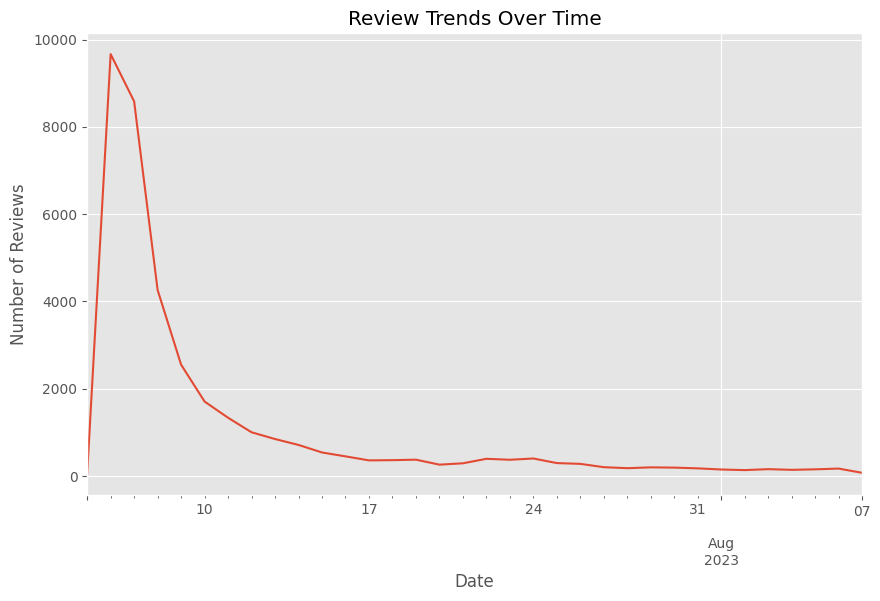

In [9]:
# Review trends over time
df['review_date'] = pd.to_datetime(df['review_date'])
plt.figure(figsize=(10, 6))
df.resample('D', on='review_date').size().plot()
plt.title('Review Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()

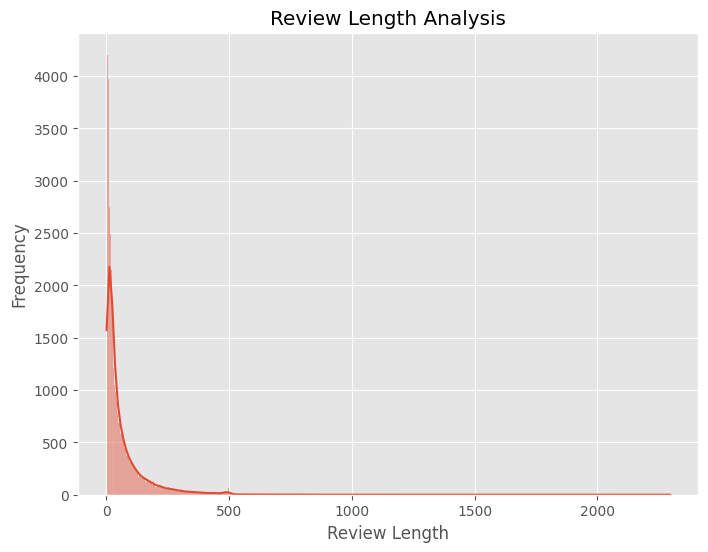

In [10]:
# Review length analysis
df['review_length'] = df['review_description'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='review_length', kde=True)
plt.title('Review Length Analysis')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

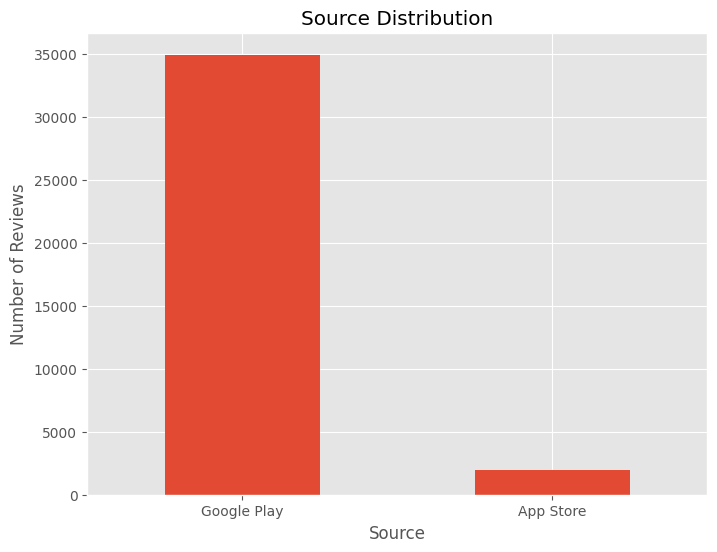

In [12]:
# Source analysis
source_counts = df['source'].value_counts()
plt.figure(figsize=(8, 6))
source_counts.plot(kind='bar')
plt.title('Source Distribution')
plt.xlabel('Source')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

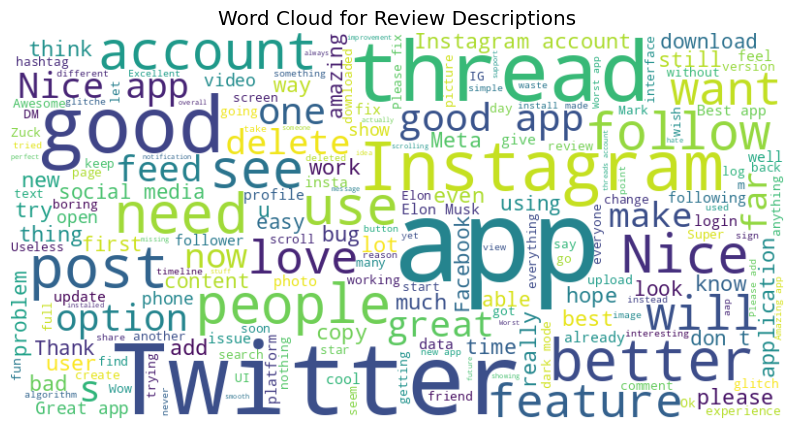

In [13]:
# Review sentiment analysis
# Word cloud for review descriptions
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['review_description']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Review Descriptions')
plt.axis('off')
plt.show()